Numpy array ...
[ 0.          0.19866933  0.38941834 ...,  0.0211657   0.21936862
  0.40882601]
Plot of first 100 points ...


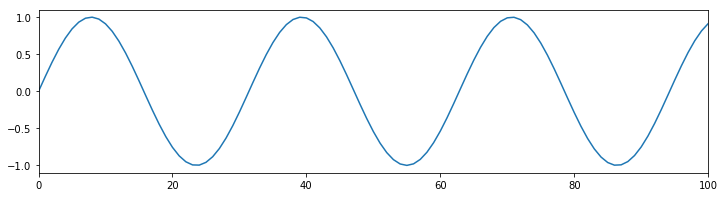

Pandas DataFrame format ...
      sinwave
idx          
0    0.000000
1    0.198669
2    0.389418
3    0.564642
4    0.717356
Saving CSV file ...


In [238]:
from math import sin
import matplotlib.pyplot as plt
import numpy
import pandas

# sin generation parameters 
x0 = 0.0
step = 0.2
nsteps = 100000

data = []
x = x0

for i in range(0,nsteps):
    y = sin(x)
    x = x + step
    data.append(y)
    
# Convert to numpy array
data = numpy.array(data)
print('Numpy array ...')
print(data)

# Plot
print('Plot of first 100 points ...')
plt.rcParams["figure.figsize"] = [12,3]
plt.xlim(0,100)
plt.plot(data)
plt.show()

# Convert to pandas DataFrame format
data = pandas.DataFrame(data)
data.columns = ['sinwave']
data.index.name = 'idx'
print('Pandas DataFrame format ...')
print(data.head())

# save as coma separated value file
print('Saving CSV file ...')
data.to_csv('~/syntetic-data.csv')

In [239]:
filename = '~/syntetic-data.csv'

sequence_len = 8
features_len = 2
total_len = sequence_len + features_len

# Read CVS file with data
df = pandas.read_csv(filename,index_col=0)

print('DataFrame after reading CSV file ...')
print(df.head())

# Change the name of the column for numeric
df.columns = [0]

# Create columns with shifted data to create rows of connected data
for i in range(1,total_len):  
    df[i] = df[i-1].shift(-1)
    
# drop all rows with NaN elements 
df = df.dropna()

print('DataFrame after creating sets of data ...')

print(df.head())

DataFrame after reading CSV file ...
      sinwave
idx          
0    0.000000
1    0.198669
2    0.389418
3    0.564642
4    0.717356
DataFrame after creating sets of data ...
            0         1         2         3         4         5         6  \
idx                                                                         
0    0.000000  0.198669  0.389418  0.564642  0.717356  0.841471  0.932039   
1    0.198669  0.389418  0.564642  0.717356  0.841471  0.932039  0.985450   
2    0.389418  0.564642  0.717356  0.841471  0.932039  0.985450  0.999574   
3    0.564642  0.717356  0.841471  0.932039  0.985450  0.999574  0.973848   
4    0.717356  0.841471  0.932039  0.985450  0.999574  0.973848  0.909297   

            7         8         9  
idx                                
0    0.985450  0.999574  0.973848  
1    0.999574  0.973848  0.909297  
2    0.973848  0.909297  0.808496  
3    0.909297  0.808496  0.675463  
4    0.808496  0.675463  0.515501  


In [240]:
import math 

values = df.values
training_len = math.floor(len(values)*0.75)

# Assign training set (train_x) of data series as 70% of the data 
# we have read from the file, the rest will be used a validation 
# (testing) set (test_x) - data is represented by 'traning_len' 
# first columns of the generated vector
train_x = values[:training_len,:-features_len]
test_x  = values[training_len:,:-features_len]

# Assign true values (features) that we will try to predict for training
# and testing parts - this data is represented by last two columns of the 
# original array
train_y = values[:training_len,-features_len:]
test_y  = values[training_len:,-features_len:]

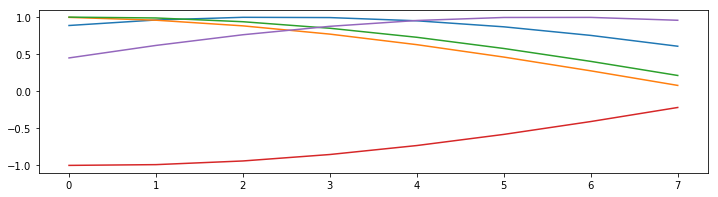

In [241]:
# Plot random sample of training sequences
n_samples = 5

plt.rcParams["figure.figsize"] = [12,3]

dat = df.sample(n_samples).values[:,:-2].T

plt.plot(dat)
plt.show()

In [242]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

def build_model(inp_dim,out_dim,layers):
    model = Sequential()

    model.add(LSTM(layers[0],
        input_shape=(inp_dim[0], inp_dim[1]),
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[1], return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2], return_sequences=False))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=out_dim[0]))
    model.add(Activation("tanh"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model

# reshape data for Keras model - 3D [samples, timesteps, features]
#train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
#test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

print(train_x.shape)

model = build_model([8, 1],[2], [100,50,50])

history = model.fit(
    train_x,
    train_y,
    batch_size=512,
    validation_data=(test_x, test_y), 
    shuffle=True,
    epochs=10)

(74993, 8, 1)


/Users/marcin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2)`


Train on 74993 samples, validate on 24998 samples
Epoch 1/10
74993/74993 [==============================] - 63s - loss: 0.0759 - val_loss: 0.0167
Epoch 2/10
74993/74993 [==============================] - 58s - loss: 0.0150 - val_loss: 0.0040
Epoch 3/10
74993/74993 [==============================] - 61s - loss: 0.0075 - val_loss: 0.0033
Epoch 4/10
74993/74993 [==============================] - 71s - loss: 0.0047 - val_loss: 6.2475e-04
Epoch 5/10
74993/74993 [==============================] - 73s - loss: 0.0035 - val_loss: 9.5265e-04
Epoch 6/10
74993/74993 [==============================] - 68s - loss: 0.0028 - val_loss: 0.0031
Epoch 7/10
74993/74993 [==============================] - 78s - loss: 0.0024 - val_loss: 0.0042
Epoch 8/10
74993/74993 [==============================] - 75s - loss: 0.0022 - val_loss: 0.0012
Epoch 9/10
74993/74993 [==============================] - 70s - loss: 0.0020 - val_loss: 6.2218e-04
Epoch 10/10
74993/74993 [==============================] - 78s - loss: 0.0

In [243]:
predicted = model.predict(test_x)

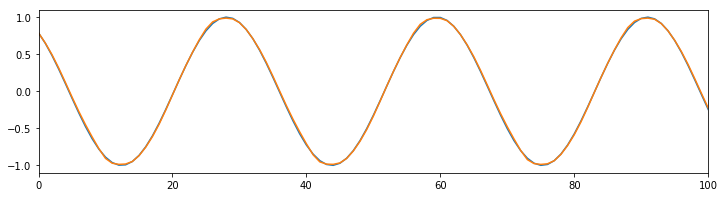

In [244]:
test_data = test_y[:,:-1]
predicted_data = predicted[:,:-1]

plt.xlim(0,100)
plt.plot(test_data,label='Test data')
plt.plot(predicted_data,label='Predicted data')
plt.show()